<a href="https://colab.research.google.com/github/Azimoj/CNN/blob/main/W10_Dojo_NN_vs_CNN_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans ce Dojo, nous travaillerons avec le jeu de données MNIST.

L'objectif est d'entraîner un modèle classique de réseau de neurones (seulement des couches denses) et de comparer ses résultats à un modèle CNN.

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import keras

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

## 1. Explorer les données

1.1.

Quel est le format des données ?

Combien de données avons-nous ?

Quel est le format des labels ?

In [ ]:
print('X_train.shape', X_train.shape)
print('y_train.shape',y_train.shape)
print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)

X_train.shape (60000, 28, 28)
y_train.shape (60000,)
X_test.shape (10000, 28, 28)
y_test.shape (10000,)


In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

1.2. Visualiser quelques images et afficher les labels associés.

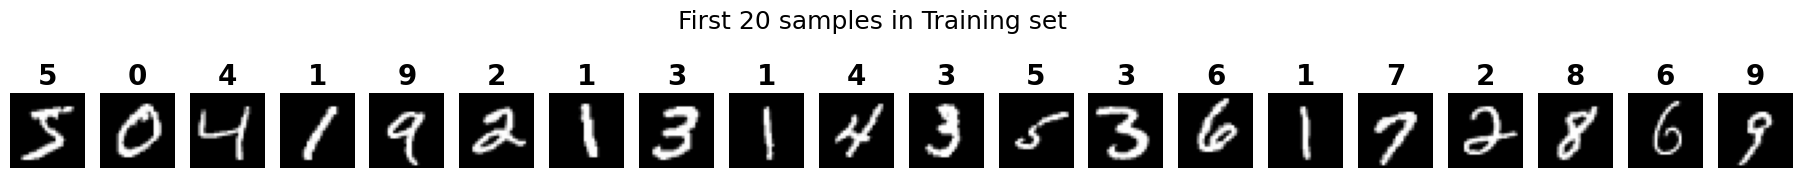

In [ ]:
samples = 20

fig, axs = plt.subplots(1, samples, figsize=(23, 2.5))

for i in range (0, samples):
  axs.flat[i].imshow(X_train[i], cmap='gray')
  axs.flat[i].set_title(y_train[i], fontsize=20, fontweight="bold")
  axs.flat[i].axis('off')
plt.suptitle(f"First {samples} samples in Training set", fontsize=18)
plt.show()

## 2. Créer le modèle

2.1. Normaliser la valeur des pixels en les divisant par 255.

In [ ]:
X_train_normalize = X_train / 255
X_test_normalize = X_test / 255

2.2. Créer un réseau de neurones n'utilisant pas de couche de convulution.

Votre modèle peut contenir :    
- Une input layer
- Une couche flatten
- Des couches denses

Une fois le modèle créé, afficher son `summary`.

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.layers.Input(input_shape),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ]
)

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2.3. Compiler le modèle et lancer l'entraînement.

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_normalize, y_train, epochs=20, batch_size=256, validation_data=(X_test_normalize, y_test))

Epoch 1/20
235/235 [==============================] - 2s 6ms/step - loss: 0.5175 - accuracy: 0.8609 - val_loss: 0.2716 - val_accuracy: 0.9254
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.2501 - accuracy: 0.9293 - val_loss: 0.2244 - val_accuracy: 0.9358
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2001 - accuracy: 0.9435 - val_loss: 0.1803 - val_accuracy: 0.9498
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1669 - accuracy: 0.9534 - val_loss: 0.1611 - val_accuracy: 0.9548
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1430 - accuracy: 0.9592 - val_loss: 0.1392 - val_accuracy: 0.9605
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1248 - accuracy: 0.9653 - val_loss: 0.1269 - val_accuracy: 0.9628
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1099 - accuracy: 0.9692 - val_loss: 0.1166 - val_accuracy: 0.9662
Epoch 

2.4. Afficher les courbes d'entraînement (métrique d'évaluation et loss)

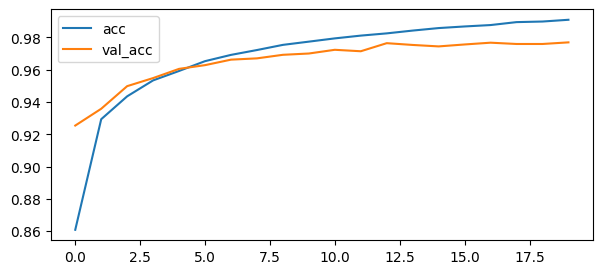

In [ ]:
plt.figure(figsize=(7, 3))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

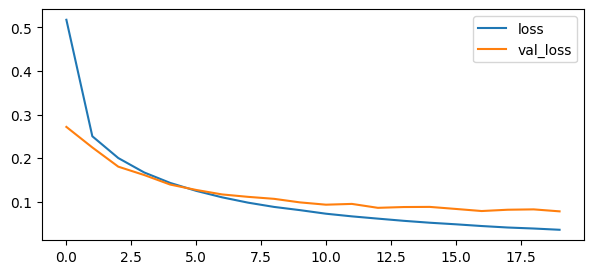

In [ ]:
plt.figure(figsize=(7, 3))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

2.5. Evaluer le modèle sur le jeu de test.

In [ ]:
model.evaluate(X_test_normalize, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.9769


[0.07773825526237488, 0.9768999814987183]

## 3. Entraîner un CNN

Entraîner un CNN et comparer ses performances au modèle entraîné préalablement.

In [ ]:
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.layers.Input(input_shape),
        keras.layers.Conv2D(64, 3, activation='relu'),
        keras.layers.MaxPool2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(10, activation='softmax')
    ]
)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

history = model.fit(X_train_normalize, y_train, epochs=20, batch_size=256, validation_data=(X_test_normalize, y_test))

model.evaluate(X_test_normalize, y_test)

Epoch 1/20
235/235 [==============================] - 3s 7ms/step - loss: 0.3619 - accuracy: 0.8934 - val_loss: 0.1049 - val_accuracy: 0.9688
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1249 - accuracy: 0.9629 - val_loss: 0.0651 - val_accuracy: 0.9787
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0876 - accuracy: 0.9741 - val_loss: 0.0514 - val_accuracy: 0.9820
Epoch 4/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0699 - accuracy: 0.9790 - val_loss: 0.0473 - val_accuracy: 0.9827
Epoch 5/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0595 - accuracy: 0.9819 - val_loss: 0.0411 - val_accuracy: 0.9854
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0516 - accuracy: 0.9848 - val_loss: 0.0411 - val_accuracy: 0.9863
Epoch 7/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0444 - accuracy: 0.9867 - val_loss: 0.0427 - val_accuracy: 0.9855
Epoch 

[0.04230532422661781, 0.988099992275238]

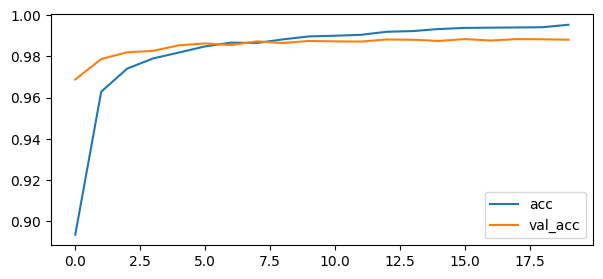

In [ ]:
plt.figure(figsize=(7, 3))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

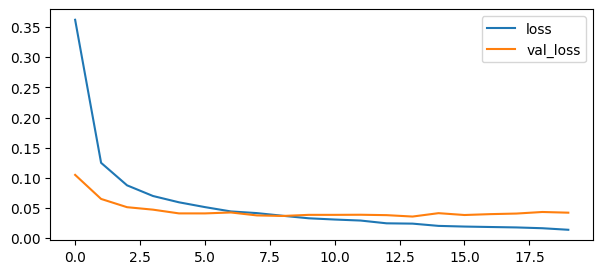

In [ ]:
plt.figure(figsize=(7, 3))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()